In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading in CSV files
raw_ratings_df = pd.read_csv("../Resources/HospitalGeneralInformation.csv", encoding = 'cp1252')
raw_income_df = pd.read_csv("../Resources/Income_data_with_overlays.csv")

#TESTtest_df = pd.DataFrame({
#     "badNumber":["Number",1,2,3,4,5],
#     "badName":["Name","a","b","c","d","e"],
#     "badValue":["Value",10,20,30,40,50]
#    })
#TESTtest_df.head()
#raw_income_df[['S1901_C01_003E']].head()

In [3]:
#Seeing what the income file looks like
raw_income_df.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C02_001E,S1901_C02_001M,S1901_C03_001E,S1901_C03_001M,S1901_C04_001E,S1901_C04_001M,...,S1901_C04_015E,S1901_C04_015M,S1901_C01_016E,S1901_C01_016M,S1901_C02_016E,S1901_C02_016M,S1901_C03_016E,S1901_C03_016M,S1901_C04_016E,S1901_C04_016M
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...,Estimate!!Households!!PERCENT ALLOCATED!!Nonfa...,Margin of Error!!Households MOE!!PERCENT ALLOC...,Estimate!!Families!!PERCENT ALLOCATED!!Nonfami...,Margin of Error!!Families MOE!!PERCENT ALLOCAT...,Estimate!!Married-couple families!!PERCENT ALL...,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...
1,0400000US01,Alabama,1855184,11821,1214794,12486,879227,11979,640390,12125,...,(X),(X),(X),(X),(X),(X),(X),(X),33.3,(X)
2,0400000US02,Alaska,254551,3266,167527,4191,127824,3685,87024,3673,...,(X),(X),(X),(X),(X),(X),(X),(X),26.9,(X)
3,0400000US04,Arizona,2614298,11305,1713006,14051,1247270,13173,901292,11708,...,(X),(X),(X),(X),(X),(X),(X),(X),32.0,(X)
4,0400000US05,Arkansas,1156347,7393,769134,11117,553461,9588,387213,9216,...,(X),(X),(X),(X),(X),(X),(X),(X),34.0,(X)


In [4]:
#*************CLEANING UP INCOME DATA IN STEPS
#Creating a list to hold the desired column names
newColumnNames = []

#Loop through columns adding the first row item to the desired column names list
for column in raw_income_df.columns:
    name = raw_income_df.loc[0,column]
    newColumnNames.append(name)

#Show what the new column names should be
newColumnNames

['id',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Margin of Error!!Households MOE!!Total',
 'Estimate!!Families!!Total',
 'Margin of Error!!Families MOE!!Total',
 'Estimate!!Married-couple families!!Total',
 'Margin of Error!!Married-couple families MOE!!Total',
 'Estimate!!Nonfamily households!!Total',
 'Margin of Error!!Nonfamily households MOE!!Total',
 'Estimate!!Households!!Total!!Less than $10,000',
 'Margin of Error!!Households MOE!!Total!!Less than $10,000',
 'Estimate!!Families!!Total!!Less than $10,000',
 'Margin of Error!!Families MOE!!Total!!Less than $10,000',
 'Estimate!!Married-couple families!!Total!!Less than $10,000',
 'Margin of Error!!Married-couple families MOE!!Total!!Less than $10,000',
 'Estimate!!Nonfamily households!!Total!!Less than $10,000',
 'Margin of Error!!Nonfamily households MOE!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Margin of Error!!Households MOE!!Total!!$10,000 to $14,999',
 'Estimate!!Famil

In [5]:
#Changing the codified column names to the new names pulled from the DF
raw_income_df.columns = newColumnNames

#Show the new column names
raw_income_df.head()

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...,Estimate!!Households!!PERCENT ALLOCATED!!Nonfa...,Margin of Error!!Households MOE!!PERCENT ALLOC...,Estimate!!Families!!PERCENT ALLOCATED!!Nonfami...,Margin of Error!!Families MOE!!PERCENT ALLOCAT...,Estimate!!Married-couple families!!PERCENT ALL...,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...
1,0400000US01,Alabama,1855184,11821,1214794,12486,879227,11979,640390,12125,...,(X),(X),(X),(X),(X),(X),(X),(X),33.3,(X)
2,0400000US02,Alaska,254551,3266,167527,4191,127824,3685,87024,3673,...,(X),(X),(X),(X),(X),(X),(X),(X),26.9,(X)
3,0400000US04,Arizona,2614298,11305,1713006,14051,1247270,13173,901292,11708,...,(X),(X),(X),(X),(X),(X),(X),(X),32.0,(X)
4,0400000US05,Arkansas,1156347,7393,769134,11117,553461,9588,387213,9216,...,(X),(X),(X),(X),(X),(X),(X),(X),34.0,(X)


In [6]:
#Now first row of data is not needed, Dropping the first row
raw_income_df.drop([0], inplace=True)

#Show removal of first row with duplicate data
raw_income_df.head()

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
1,0400000US01,Alabama,1855184,11821,1214794,12486,879227,11979,640390,12125,...,(X),(X),(X),(X),(X),(X),(X),(X),33.3,(X)
2,0400000US02,Alaska,254551,3266,167527,4191,127824,3685,87024,3673,...,(X),(X),(X),(X),(X),(X),(X),(X),26.9,(X)
3,0400000US04,Arizona,2614298,11305,1713006,14051,1247270,13173,901292,11708,...,(X),(X),(X),(X),(X),(X),(X),(X),32.0,(X)
4,0400000US05,Arkansas,1156347,7393,769134,11117,553461,9588,387213,9216,...,(X),(X),(X),(X),(X),(X),(X),(X),34.0,(X)
5,0400000US06,California,13072122,21485,8934621,23655,6458423,27202,4137501,24438,...,(X),(X),(X),(X),(X),(X),(X),(X),33.1,(X)


In [7]:
#Want to remove the unnecessary rows

#List of the rows we want to analyze
columns_to_keep = ['Geographic Area Name',
                   'Estimate!!Households!!Total',
                   'Estimate!!Households!!Total!!Less than $10,000',
                   'Estimate!!Households!!Total!!$10,000 to $14,999',
                   'Estimate!!Households!!Total!!$15,000 to $24,999',
                   'Estimate!!Households!!Total!!$25,000 to $34,999',
                   'Estimate!!Households!!Total!!$35,000 to $49,999',
                   'Estimate!!Households!!Total!!$50,000 to $74,999',
                   'Estimate!!Households!!Total!!$75,000 to $99,999',
                   'Estimate!!Households!!Total!!$100,000 to $149,999',
                   'Estimate!!Households!!Total!!$150,000 to $199,999',
                   'Estimate!!Households!!Total!!$200,000 or more',
                   'Estimate!!Households!!Median income (dollars)',
                   'Estimate!!Households!!Mean income (dollars)'
                  ]
#Creating a new dataframe that keeps only the columns we want to analyze
income_df = raw_income_df[columns_to_keep]

#Show the new dataframe with less columns
income_df

,Geographic Area Name,Estimate!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
1,Alabama,1855184,9.1,6.0,11.9,10.1,13.0,17.4,12.0,12.1,4.4,4.0,49861,69091
2,Alaska,254551,4.5,3.3,6.4,6.6,10.3,19.3,13.4,19.0,8.3,8.8,74346,96080
3,Arizona,2614298,6.0,3.6,9.5,9.3,13.5,19.1,13.1,14.2,5.7,5.8,59246,80477
4,Arkansas,1156347,8.2,6.1,12.3,11.3,15.2,17.8,10.6,11.3,3.8,3.6,47062,66766
5,California,13072122,5.1,3.9,7.5,7.2,10.4,15.6,12.3,16.6,8.9,12.4,75277,107384
6,Colorado,2176757,4.9,3.3,7.2,7.4,11.7,17.5,13.6,17.5,8.2,8.7,71953,96218
7,Connecticut,1378091,5.3,3.9,7.2,7.2,10.1,15.5,12.2,16.9,9.3,12.4,76348,111303
8,Delaware,367671,6.0,4.0,8.3,9.3,11.5,18.2,13.7,15.7,6.6,6.6,64805,84896
9,Florida,7809358,6.5,4.5,10.1,10.1,13.9,18.4,12.1,13.2,5.2,6.0,55462,79968
10,Georgia,3803012,7.1,4.1,9.5,9.5,12.8,17.8,12.3,14.2,5.9,6.7,58756,82489


In [8]:
#Clean up column names now that we have the correct columns
#List of new names to be used
clean_names = ['State',
               'Total Households',
               '<$10,000(%)',
               '$10,000 to $14,999(%)',
               '$15,000 to $24,999(%)',
               '$25,000 to $34,999(%)',
               '$35,000 to $49,999(%)',
               '$50,000 to $74,999(%)',
               '$75,000 to $99,999(%)',
               '$100,000 to $149,999(%)',
               '$150,000 to $199,999(%)',
               '>$200,000(%)',
               'Median Income(dollars)',
               'Mean Income(dollars)'
              ]
#Change the badly formatted Column names to the list of clean names
income_df.columns = clean_names

#Show Final clean income DF
income_df.head()

#converting the overall ratings column to numeric type
income_df['Median Income(dollars)'] = income_df['Median Income(dollars)'].astype(int)

<ipython-input-8-50fe46fd6447>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df['Median Income(dollars)'] = income_df['Median Income(dollars)'].astype(int)


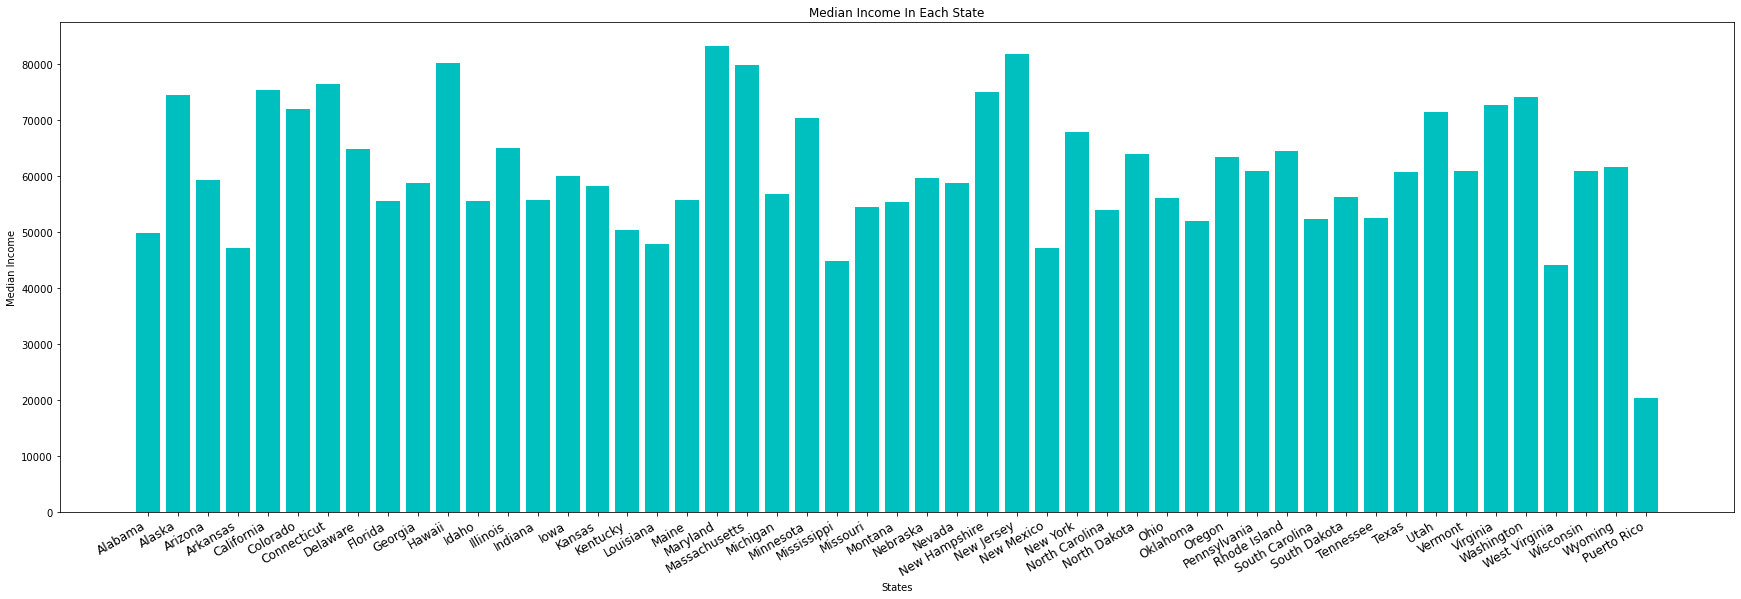

In [25]:
x = income_df['State']
y = income_df['Median Income(dollars)']
plt.bar(x,y , color='c', alpha=1, align="center")

#ADJUST FIGURE SIZE TO NOT HAVE IT COMPRESSED HORIZONTALLY
plt.rcParams["figure.figsize"] = (30,10)

# make x labels slanted
plt.gcf().autofmt_xdate()

#font size for x axis
plt.tick_params(axis='x', which='major', labelsize=12)

#Labels
plt.title('Median Income In Each State')
plt.xlabel('States')
plt.ylabel('Median Income')

plt.show()


In [10]:
#*************CLEANING UP INCOME DATA ONE ACTION
#Creating a list to hold the desired column names
#newColumnNames = []

#Loop through columns adding the first row item to the desired column names list
#for column in raw_income_df.columns:
#    name = raw_income_df.loc[0,column]
#    newColumnNames.append(name)

#Changing column names to the correct names
#raw_income_df.columns = newColumnNames

#Removing no longer needed first data row
#raw_income_df.drop([0], inplace=True)

#List of the rows we want to analyze
#columns_to_keep = ['Geographic Area Name',
#                   'Estimate!!Households!!Total',
#                  'Estimate!!Households!!Total!!Less than $10,000',
#                  'Estimate!!Households!!Total!!$10,000 to $14,999',
#                  'Estimate!!Households!!Total!!$15,000 to $24,999',
#                  'Estimate!!Households!!Total!!$25,000 to $34,999',
#                  'Estimate!!Households!!Total!!$35,000 to $49,999',
#                  'Estimate!!Households!!Total!!$50,000 to $74,999',
#                  'Estimate!!Households!!Total!!$75,000 to $99,999',
#                  'Estimate!!Households!!Total!!$100,000 to $149,999',
#                  'Estimate!!Households!!Total!!$150,000 to $199,999',
#                  'Estimate!!Households!!Total!!$200,000 or more',
#                  'Estimate!!Households!!Median income (dollars)',
#                  'Estimate!!Households!!Mean income (dollars)'
#                 ]

#Creating a new dataframe that keeps only the columns we want to analyze
#income_df = raw_income_df[columns_to_keep]

#Clean up column names now that we have the correct columns
#List of new names to be used
#clean_names = ['State',
#               'Total Households',
#              '<$10,000(%)',
#              '$10,000 to $14,999(%)',
#              '$15,000 to $24,999(%)',
#              '$25,000 to $34,999(%)',
#              '$35,000 to $49,999(%)',
#              '$50,000 to $74,999(%)',
#              '$75,000 to $99,999(%)',
#              '$100,000 to $149,999(%)',
#              '$150,000 to $199,999(%)',
#              '>$200,000(%)',
#              'Median Income(dollars)',
#              'Mean Income(dollars)'
#             ]
#Change the badly formatted Column names to the list of clean names
#income_df.columns = clean_names

#Show Final clean income DF
#income_df.head()


In [11]:
#****************CLEANING UP RATINGS DATA
#create new DF to remove non-important columns

#Listing the columns to keep for easy editability
columns_to_keep = ['Hospital Name',
                    'City',
                    'State',
                    'ZIP Code',
                    'County Name',
                    'Hospital Type',
                    'Hospital Ownership',
                    'Hospital overall rating',
                    'Mortality national comparison',
                    'Safety of care national comparison',
                    'Readmission national comparison',
                    'Patient experience national comparison',
                    'Effectiveness of care national comparison',
                    'Timeliness of care national comparison',
                    'Efficient use of medical imaging national comparison'
                   ]
#Creating new DF with only columns of interest
ratings_df = raw_ratings_df[columns_to_keep]

#TESTING TO SEE NEW DF
ratings_df.head()

#Removing Rows where overall rating is “not available”
ratings_df = ratings_df[ratings_df['Hospital overall rating'] != 'Not Available']

#converting the overall ratings column to numeric type
ratings_df['Hospital overall rating'] = ratings_df['Hospital overall rating'].astype(int)


In [12]:
#extract state and hospital ratings
state_and_ratings_df = ratings_df[["State","Hospital overall rating"]]
#state_and_ratings_df
state_mean_df = state_and_ratings_df.groupby(['State']).mean()
state_mean_df

,Hospital overall rating
State,
AK,2.888889
AL,3.050633
AR,2.836364
AZ,2.944444
CA,2.841379
CO,3.450980
CT,2.714286
DC,1.428571
DE,3.666667


In [13]:
#Renaming, turning abbreviations to state names
state_names = ['Alaska',
               'Alabama',
               'Arkansas',
               'Arizona',
               'California',
               'Colorado',
               'Connecticut',
               'District of Columbia',
               'Delaware',
               'Florida',
               'Georgia',
               'Guam',
               'Hawaii',
               'Iowa',
               'Indiana',
               'Illinois',
               'Indiana',
               'Kansas',
               'Kentucky',
               'Louisiana',
               'Massachusetts',
               'Maine',
               'Michigan',
               'Minnesota',
               'Missouri',
               'Mississippi',
               'Montana',
               'North Carolina',
               'North Dakota',
               'Nebraska',
               'New Hampshire',
               'New Jersey',
               'New Mexico',
               'Nevada',
               'New York',
               'Ohio',
               'Oklahoma',
               'Oregon',
               'Pennsylvania',
               'Puerto Rico',
               'Rhode Island',
               'South Carolina',
               'South Dakota',
               'Tennessee',
               'Texas',
               'Utah',
               'Virginia',
               'Virgin Islands',
               'Vermont',
               'Washington',
               'Wisconsin',
               'West Virginia',
               'Wyoming'
             ] 
state_mean_df['State Name']=state_names
state_mean_df

,Hospital overall rating,State Name
State,,
AK,2.888889,Alaska
AL,3.050633,Alabama
AR,2.836364,Arkansas
AZ,2.944444,Arizona
CA,2.841379,California
CO,3.450980,Colorado
CT,2.714286,Connecticut
DC,1.428571,District of Columbia
DE,3.666667,Delaware


In [14]:
#cleanup 
state_mean_clean_df = state_mean_df.loc[:,['State Name','Hospital overall rating']]
state_mean_clean_df

,State Name,Hospital overall rating
State,,
AK,Alaska,2.888889
AL,Alabama,3.050633
AR,Arkansas,2.836364
AZ,Arizona,2.944444
CA,California,2.841379
CO,Colorado,3.450980
CT,Connecticut,2.714286
DC,District of Columbia,1.428571
DE,Delaware,3.666667


In [15]:

#Created a new income dataframe with only state and median income columns
income_compare_df = income_df.loc[:,['State','Median Income(dollars)']]

#changed the column names to match the comparison ratings dataframe(specifically State Name)
income_compare_df.columns = ['State Name', 'Median Income(dollars)']
income_compare_df

,State Name,Median Income(dollars)
1,Alabama,49861
2,Alaska,74346
3,Arizona,59246
4,Arkansas,47062
5,California,75277
6,Colorado,71953
7,Connecticut,76348
8,Delaware,64805
9,Florida,55462
10,Georgia,58756


In [16]:
#combing datasets
merge_df = pd.merge(income_compare_df,state_mean_clean_df, on='State Name',how='inner')
merge_df

,State Name,Median Income(dollars),Hospital overall rating
0,Alabama,49861,3.050633
1,Alaska,74346,2.888889
2,Arizona,59246,2.944444
3,Arkansas,47062,2.836364
4,California,75277,2.841379
5,Colorado,71953,3.450980
6,Connecticut,76348,2.714286
7,Delaware,64805,3.666667
8,Florida,55462,2.662722
9,Georgia,58756,2.935185


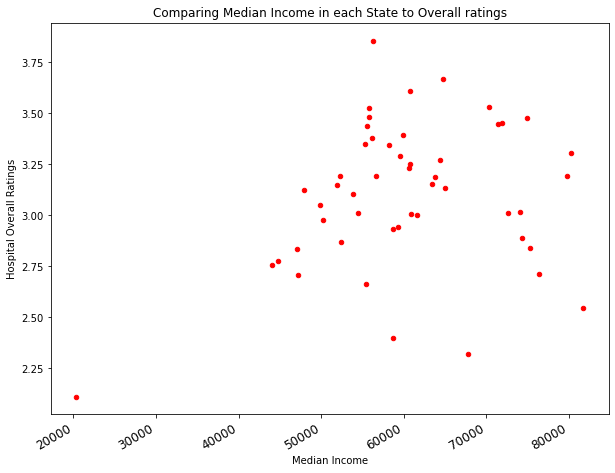

In [24]:
merge_df.plot(kind='scatter',x='Median Income(dollars)',y='Hospital overall rating',color='r')

#ADJUST FIGURE SIZE TO NOT HAVE IT COMPRESSED HORIZONTALLY
plt.rcParams["figure.figsize"] = (30,10)

# make x labels slanted
plt.gcf().autofmt_xdate()

#font size for x axis
plt.tick_params(axis='x', which='major', labelsize=12)

#Labels
plt.title('Comparing Median Income in each State to Overall ratings')
plt.xlabel('Median Income')
plt.ylabel('Hospital Overall Ratings')

plt.show()


In [ ]:
#HERE WE HAVE CLEANED UP DATAFRAMES FOR OUR ANALYSIS

In [ ]:
#Thoughts on To do...
#Look at hospital ratings(general rating) and income (median by state) to see if they have normal distributions
#Comparing states overall Hospital ratings and graph related to state median income
#Map of Hospitals being rated w/ income overlay
#Who owns the hospitals and how do they compare in ratings
#Look at the makeup of hospital ratings 